In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Problem 3: Compare Gradient Descent method and Newton Methods

In [2]:
Sigma = np.array([
    [5,  0],
    [0, .5]
])

In [7]:
v = np.array([
    [1],
    [3]
])

In [21]:
def F(x: np.ndarray) -> float:
    return np.matmul(np.matmul(x.T, Sigma), x) + math.log(1 + math.exp(-np.matmul(np.ones(x.shape).T, x)))

In [23]:
def F1(x: np.ndarray):  # first derivative
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1+x2))
    return np.array([
        [10 * x1 - ex / ( 1 + ex )],
        [ x2 - ex / ( 1 + ex ) ]
    ])

def F2(x: np.ndarray):  # second derivative
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1+x2))
    ex = ex/(1+ex)**2
    return np.array([
        [10+ex, ex],
        [ex,  1+ex]
    ])

Newton Method with $\eta = 1$ (NM1)

In [76]:
eta = 1

x_nm1 = np.zeros((30, 2, 1))

for t in range(29):
    x_nm1[t+1] = x_nm1[t] - eta * np.matmul(np.linalg.inv(F2(x_nm1[t])), F1(x_nm1[t]))

Gradient Descent Method with constant step size $\eta = 0.10$ (GD0.1)

In [77]:
eta = 0.1

x_gd010 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd010[t+1] = x_gd010[t] - eta * F1(x_gd010[t])

Gradient Descent Method with constant step size $\eta = 0.19$ (GD0.19)

In [78]:
eta = 0.19

x_gd019 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd019[t+1] = x_gd019[t] - eta * F1(x_gd019[t])

Gradient Descent Method with constant step size $\eta = 0.20$ (GD0.2)

In [79]:
eta = 0.2

x_gd020 = np.zeros((30, 2, 1))

for t in range(29):
    x_gd020[t+1] = x_gd020[t] - eta * F1(x_gd020[t])

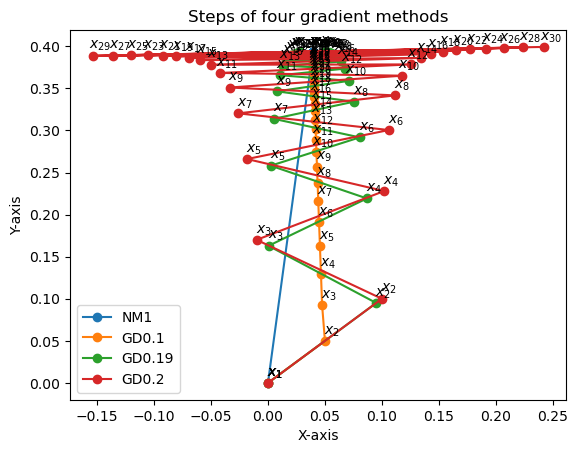

In [88]:
times = [f"$x_{{{t}}}$" for t in range(1, 31)]
# Plot the data
plt.plot(x_nm1[:,0,:], x_nm1[:,1,:], marker='o', label="NM1")
plt.plot(x_gd010[:,0,:], x_gd010[:,1,:], marker='o', label="GD0.1")
plt.plot(x_gd019[:,0,:], x_gd019[:,1,:], marker='o', label="GD0.19")
plt.plot(x_gd020[:,0,:], x_gd020[:,1,:], marker='o', label="GD0.2")

# Annotate each point with the corresponding time
for i, time in enumerate(times):
    plt.annotate(time, (x_nm1[:,0,:][i]  , x_nm1[:,1,:][i]  ), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd010[:,0,:][i], x_gd010[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd019[:,0,:][i], x_gd019[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd020[:,0,:][i], x_gd020[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')

# Show the plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Steps of four gradient methods")
plt.legend()
plt.show()

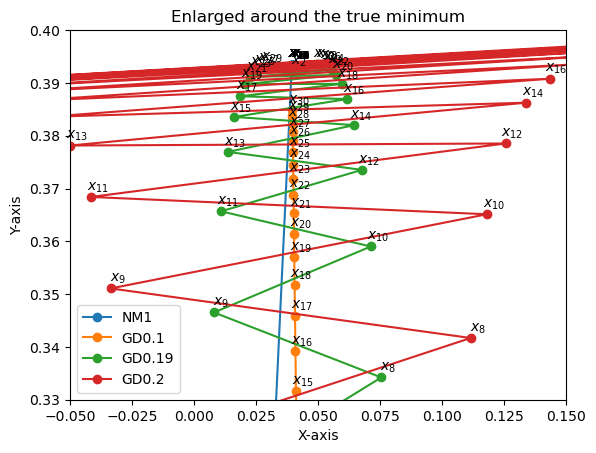

In [89]:
times = [f"$x_{{{t}}}$" for t in range(1, 31)]
# Plot the data
plt.plot(x_nm1[:,0,:], x_nm1[:,1,:], marker='o', label="NM1")
plt.plot(x_gd010[:,0,:], x_gd010[:,1,:], marker='o', label="GD0.1")
plt.plot(x_gd019[:,0,:], x_gd019[:,1,:], marker='o', label="GD0.19")
plt.plot(x_gd020[:,0,:], x_gd020[:,1,:], marker='o', label="GD0.2")

# Annotate each point with the corresponding time
for i, time in enumerate(times):
    plt.annotate(time, (x_nm1[:,0,:][i]  , x_nm1[:,1,:][i]  ), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd010[:,0,:][i], x_gd010[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd019[:,0,:][i], x_gd019[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.annotate(time, (x_gd020[:,0,:][i], x_gd020[:,1,:][i]), textcoords="offset points", xytext=(5,5), ha='center')

# Show the plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(-0.05, 0.15)
plt.ylim(0.33, 0.40)
plt.title("Enlarged around the true minimum")
plt.legend()
plt.show()

We have the following observations:

* NM1 takes only 1 step to reach the minimum and it stays there.
* GD0.1 descends towards the minimum but slowly. It is still away from the minimum after 30 steps.
* GD0.19 zigzags but generally descends towards the minimum. It reaches the proximity of the minimum within 30 steps.
* GD0.20 zigzags and deviates away from the minimum. This is the case when the step size is too big. (i.e., when $\eta > \frac{2}{\beta}$)

# Problem 5: Regular SGD vs AdaGrad Optimization on a Regression Problem

In [271]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})

import random
import time
import matplotlib.pyplot as plt
import time

# initialization
sigma = 1
d = 10
c_square = 100
cov = np.diag([(0.25**i) * c_square for i in range(1,d+1)])
mean = [0] * d

# coefficient given
w_star = np.array([1]*d)

# Sampler function
def sampler(n: int) -> tuple[np.ndarray, np.ndarray]:
    # data X generator
    np.random.seed(int(time.time() * 100000) % 100000)
    X = np.random.multivariate_normal(mean, cov, n)
    # data Y generator
    Y = np.matmul(X, w_star) + np.random.normal(0, sigma**2, n)
    return (X.reshape(n, -1, 1) , Y.reshape(n, 1))

## Part A

We have
$$ F(w_t) = \frac{1}{n} \sum_{i=0}^{n} (Y_i - w_t^T X_i)^2 + \lambda w_t^T w_t $$
We only look at the $(X_t, Y_t)$ to calculate $\tilde{\nabla} F(w_t) := \nabla f_t (w_t)$,

$$ f_t (w_t) = (Y_t - w_t^T X_t)^2 + \lambda w_t^T w_t = Y_t^2 - 2 Y_t w_t^T X_t + w_t^T X_t X_t^T w_t + \lambda w_t^T w_t $$
<!-- \begin{aligned}
    f_t (w_t) & = (Y_t - w_t^T X_t)^2 + \lambda w_t^T w_t \\

    & = Y_t^2 - 2 Y_t w_t^T X_t + w_t^T X_t X_t^T w_t + \lambda w_t^T w_t
\end{aligned} -->
Then, differentiate with respect to $w_t$ (using results from Problem 2)

$$ \tilde{\nabla} F(w_t) := \nabla f_t (w_t) = 0 - 2 Y_t X_t + X_t^T X_t w_t + X_t X_t^T w_t + 2 \lambda w_t $$

$$ \tilde{\nabla} F(w_t) = - 2 Y_t X_t + 2 X_t^T X_t w_t + 2 \lambda w_t $$
<!-- \begin{aligned}
    \tilde{\nabla} F(w_t) := \nabla f_t (w_t) & = 0 - 2 Y_t X_t + X_t^T X_t w_t + X_t X_t^T w_t + 2 \lambda w_t \\
    & = - 2 Y_t X_t + 2 X_t^T X_t w_t + 2 \lambda w_t
\end{aligned} -->

## Part B

In [65]:
LAMBDA = 0.10
N = 1000
BETA = 2 * (cov[0][0] + LAMBDA)

In [95]:
X, Y = sampler(N)
X.shape, Y.shape

((1000, 10, 1), (1000, 1))

Notice that the first dimension of $X$ has the largest deviations, while the last few dimensions are all close-to-zero values. This makes it hard for our algorithm to learn the weights of the dimensions for which they have no variance.

*I only print the first ten rows of data ($t = 1, 2, \cdots, 10$) to save space*

In [121]:
X[:,0][:10]

array([[-2.26],
       [-3.63],
       [5.95],
       [-2.11],
       [-1.00],
       [-3.02],
       [-3.39],
       [0.11],
       [7.52],
       [5.63]])

In [120]:
X[:,9][:10]

array([[0.00],
       [-0.01],
       [0.00],
       [0.01],
       [-0.02],
       [0.02],
       [0.00],
       [-0.01],
       [0.01],
       [0.01]])

We implement the gradient function:

In [334]:
def tilde_f_grad(wt: np.ndarray, x: np.ndarray, y: float) -> np.ndarray:
    grad = np.zeros(x.shape)
    grad += -2 * y * x
    grad += np.matmul(x.T, x) * wt
    grad += np.matmul(np.matmul(x, x.T), wt)
    grad += 2 * LAMBDA * wt
    return grad

### Regular SGD Implementation

In [330]:
def reg_sgd(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    w_regsgd = np.zeros((N, d, 1))
    sigma_2 = np.zeros((N, 1))

    for t in range(N-1):
        grad = tilde_f_grad(w_regsgd[t], X[t], Y[t])
        norm = np.matmul(grad.T, grad)[0]
        if t > 0:
            sigma_2[t] = (sigma_2[t-1] * t + norm) / (t+1)
        else:
            sigma_2[t] = norm
        
        eta = np.sqrt(1 / (BETA * sigma_2[t]))
        w_regsgd[t+1] = w_regsgd[t] - eta * grad

    return w_regsgd

### Adagrad Implementation

In [331]:
def adagrad(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    w_adagrad = np.zeros((N, d, 1))
    sigma_2 = np.zeros((N, d, 1))

    for t in range(N-1):
        grad = tilde_f_grad(w_adagrad[t], X[t], Y[t])

        if t > 0:
            sigma_2[t, :, :] = (sigma_2[t-1, :, :] * t + grad**2) / (t+1)
        else:
            sigma_2[t, :, :] = grad**2
        
        eta = np.sqrt(1 / (BETA * sigma_2[t]))
        w_adagrad[t+1] = w_adagrad[t] - eta * grad
    
    return w_adagrad

## Part C

Run 10 simulations

In [332]:
NUM_EXPERIMENT = 10

In [335]:
results_regsgd  = np.zeros((NUM_EXPERIMENT, N))
results_adagrad = np.zeros((NUM_EXPERIMENT, N))

for i in range(NUM_EXPERIMENT):
    X, Y = sampler(N)

    w_regsgd  = reg_sgd(X, Y)
    w_adagrad = adagrad(X, Y)

    err_regsgd = w_regsgd - w_star.reshape(d, 1)
    norm_regsgd = np.sqrt((err_regsgd ** 2).sum(1)).reshape(-1)
    err_adagrad = w_adagrad - w_star.reshape(d, 1)
    norm_adagrad = np.sqrt((err_adagrad ** 2).sum(1)).reshape(-1)

    results_regsgd[i]  = norm_regsgd
    results_adagrad[i] = norm_adagrad

    time.sleep(0.1)

## Plot for Regular SGD

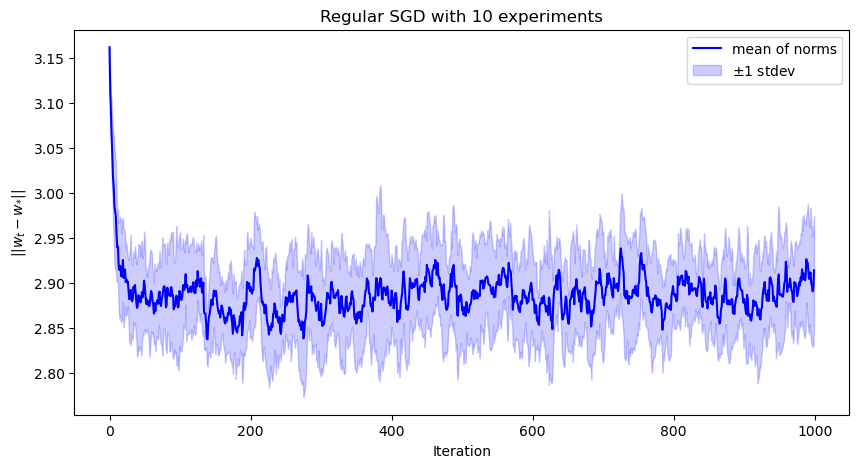

In [336]:
series = results_regsgd.sum(0) / NUM_EXPERIMENT
stdev = np.sqrt(results_regsgd.var(0))

x_values = np.arange(len(series)) 

plt.figure(figsize=(10, 5))

plt.plot(x_values, series, color='blue', label='mean of norms')  

plt.fill_between(x_values, series - stdev, series + stdev, 
                 color='blue', alpha=0.2, label='$\pm 1$ stdev')

plt.xlabel('Iteration')
plt.ylabel('$|| w_t - w_{*}||$')
plt.title(f'Regular SGD with {NUM_EXPERIMENT} experiments')
plt.legend()
plt.show()

## Plot for Adagrad

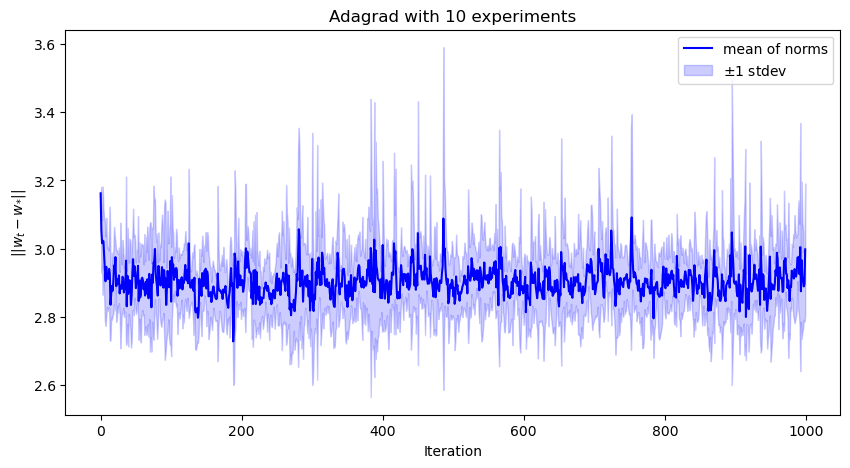

In [337]:
series = results_adagrad.sum(0) / NUM_EXPERIMENT
stdev = np.sqrt(results_adagrad.var(0))

x_values = np.arange(len(series)) 

plt.figure(figsize=(10, 5))

plt.plot(x_values, series, color='blue', label='mean of norms')  

plt.fill_between(x_values, series - stdev, series + stdev, 
                 color='blue', alpha=0.2, label='$\pm 1$ stdev')

plt.xlabel('Iteration')
plt.ylabel('$|| w_t - w_{*}||$')
plt.title(f'Adagrad with {NUM_EXPERIMENT} experiments')
plt.legend()
plt.show()

In [6]:
import requests
from bs4 import BeautifulSoup

def fetch_data(doc_url):
    """Fetches the Google Doc and extracts the character data."""
    response = requests.get(doc_url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    data = []
    table = soup.find('table')
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        x = int(cols[0].text)
        char = cols[1].text
        y = int(cols[2].text)
        data.append((x, y, char))
    # print(data)
    return data

def create_grid(data):
    """Creates and populates the 2D grid from the extracted data."""
    max_x = max(x for x, _, _ in data)
    max_y = max(y for _, y, _ in data)
    grid = [[' ' for _ in range(max_x + 1)] for _ in range(max_y + 1)]
    for x, y, char in data:
        grid[max_y-y][x] = char
    # print(grid)
    return grid

def print_grid(grid):
    """Prints the grid to the console."""
    for row in grid:
        print(''.join(row))

def print_secret_message(doc_url):
    """Main function to orchestrate the process."""
    data = fetch_data(doc_url)
    grid = create_grid(data)
    print_grid(grid)

doc_url = 'https://docs.google.com/document/d/e/2PACX-1vRMx5YQlZNa3ra8dYYxmv-QIQ3YJe8tbI3kqcuC7lQiZm-CSEznKfN_HYNSpoXcZIV3Y_O3YoUB1ecq/pub'  
print_secret_message(doc_url)


█▀▀▀
█▀▀ 
█   


In [7]:
doc_url = 'https://docs.google.com/document/d/e/2PACX-1vSHesOf9hv2sPOntssYrEdubmMQm8lwjfwv6NPjjmIRYs_FOYXtqrYgjh85jBUebK9swPXh_a5TJ5Kl/pub'
print_secret_message(doc_url)


██████████░ ██████░    ███████░  ██░           ███░ ████████░    ██░    ███░   ████████░  
██░           ██░    ███░    ██░ ███░   ███░   ██░  ██░     ██░  ██░  ███░   ███░     ███░
██░           ██░   ███░          ██░  █████░ ███░  ██░      ██░ ██░███░     ██░       ██░
████████░     ██░   ██░           ███░ ██░██░ ██░   ██░      ██░ ████░       ██░       ██░
██░           ██░   ███░           ██░██░ ██░██░    ██░      ██░ ██░███░     ██░       ██░
██░           ██░    ███░    ██░   ████░   ████░    ██░     ██░  ██░  ███░   ███░     ███░
██████████░ ██████░    ███████░     ██░     ██░     ████████░    ██░    ███░   ████████░  
